# Innomatics -Task: 1

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)

In [129]:
df=pd.read_csv(r"C:\Users\bhara\Downloads\scores_data.csv")

In [130]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [131]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [132]:
df.shape

(149, 3)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [134]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [135]:
df.columns = df.columns.str.strip()

In [136]:
df['Score'] = df['Score'].str.replace(' / 7', '')

In [137]:
len(df['Score'] [0])

1

In [138]:
df['Score']

0      6
1      6
2      7
3      7
4      4
      ..
144    4
145    4
146    4
147    3
148    2
Name: Score, Length: 149, dtype: object

In [139]:
df['Batch'].unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [140]:
df['Batch'].value_counts()


AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: Batch, dtype: int64

In [141]:
df['Score'].value_counts()

4    40
5    32
3    24
6    18
7    18
2    12
1     3
0     2
Name: Score, dtype: int64

In [142]:
df['Score'] = df['Score'].apply(lambda x: (int(x)/7)*100)

In [143]:
df['Score'] = df['Score'].apply(lambda x: int(x))

In [144]:
df['Score'] 

0       85
1       85
2      100
3      100
4       57
      ... 
144     57
145     57
146     57
147     42
148     28
Name: Score, Length: 149, dtype: int64

In [145]:
#average score of each batch:
df.groupby('Batch')['Score'].mean()


Batch
AI_ELITE_4    53.791667
AI_ELITE_6    60.000000
AI_ELITE_7    71.811321
Name: Score, dtype: float64

In [146]:
# top 10 users with the highest scores

In [147]:
df.sort_values('Score', ascending=False).head(10)


,Batch,User_ID,Score
74,AI_ELITE_6,uid_75,100
67,AI_ELITE_6,uid_82,100
16,AI_ELITE_7,uid_133,100
15,AI_ELITE_7,uid_134,100
24,AI_ELITE_7,uid_125,100
78,AI_ELITE_6,uid_71,100
19,AI_ELITE_7,uid_130,100
63,AI_ELITE_6,uid_86,100
98,AI_ELITE_6,uid_51,100
101,AI_ELITE_4,uid_48,100


In [148]:
# maximum score in each batch

In [109]:
df.groupby('Batch')['Score'].max()

Batch
AI_ELITE_4    100
AI_ELITE_6    100
AI_ELITE_7    100
Name: Score, dtype: int64

In [110]:
#the users who scored above a certain threshold:

In [111]:
df1=df[df['Score'] > 40]
df1

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,85
1,AI_ELITE_7,uid_148,85
2,AI_ELITE_7,uid_147,100
3,AI_ELITE_7,uid_146,100
4,AI_ELITE_7,uid_145,57
...,...,...,...
143,AI_ELITE_4,uid_6,42
144,AI_ELITE_4,uid_5,57
145,AI_ELITE_4,uid_4,57
146,AI_ELITE_4,uid_3,57


In [115]:
#the number of users in each batch:

In [118]:
df['Batch'].value_counts()


AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: Batch, dtype: int64

In [125]:
# list of user IDs of all the users who scored 100.
df[df['Score'] == 100]['User_ID']

2      uid_147
3      uid_146
5      uid_144
7      uid_142
15     uid_134
16     uid_133
17     uid_132
19     uid_130
24     uid_125
35     uid_114
63      uid_86
67      uid_82
74      uid_75
78      uid_71
98      uid_51
101     uid_48
105     uid_44
139     uid_10
Name: User_ID, dtype: object

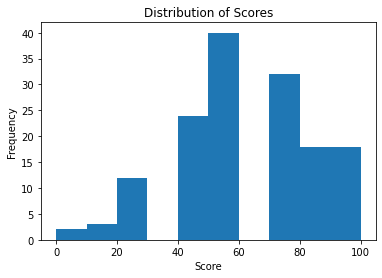

In [114]:
import matplotlib.pyplot as plt

plt.hist(df['Score'], bins=10)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()


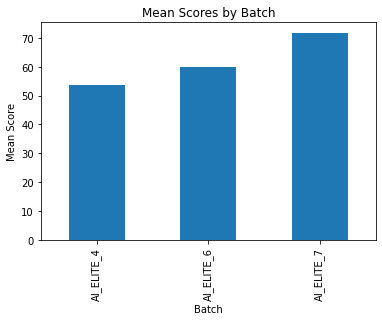

In [122]:
import matplotlib.pyplot as plt

mean_scores = df.groupby('Batch')['Score'].mean()
mean_scores.plot(kind='bar')
plt.xlabel('Batch')
plt.ylabel('Mean Score')
plt.title('Mean Scores by Batch')
plt.show()


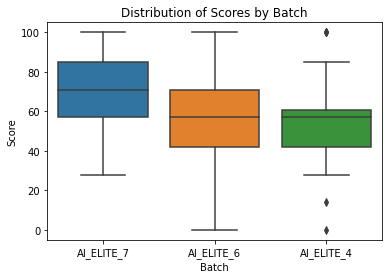

In [123]:
import seaborn as sns

sns.boxplot(x='Batch', y='Score', data=df)
plt.xlabel('Batch')
plt.ylabel('Score')
plt.title('Distribution of Scores by Batch')
plt.show()
